In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
# Funkcje Rungego
def f1(x):
    return 1 / (1 + 25 * np.array(x)**2)
def f2(x):
    return np.exp(np.cos(x))


In [3]:
# Wielomian Lagrange'a
def lagrange_interpolation(x, nodes, values):
    n = len(nodes)
    result = 0
    for j in range(n):
        numerator = 1
        denominator = 1
        for i in range(n):
            if i != j:
                numerator *= x - nodes[i]
                denominator *= nodes[j] - nodes[i]
        result += values[j] * (numerator / denominator)
    return result

In [4]:

# Wielomiany interpolujące za pomocą kubicznych funkcji sklejanych
def cubic_spline_interpolation(x, nodes, values):
    cs = CubicSpline(nodes, values)
    return cs(x)

In [5]:
#Węzły Czebyszewa
def chebyshev_nodes(a, b, n):

    theta = np.pi * (2*np.arange(n) + 1) / (2*n)
    x = np.cos(theta)
    x_transformed = a + (b - a) * (x + 1) / 2
    
    return x_transformed


In [6]:
interpolation_methods = [lagrange_interpolation, lagrange_interpolation,cubic_spline_interpolation]
titles = ['Wielomiany Lagrange\'a','Wielomiany Lagrange\'a (węzły Czebyszewa)', 'Funkcje sklejane']

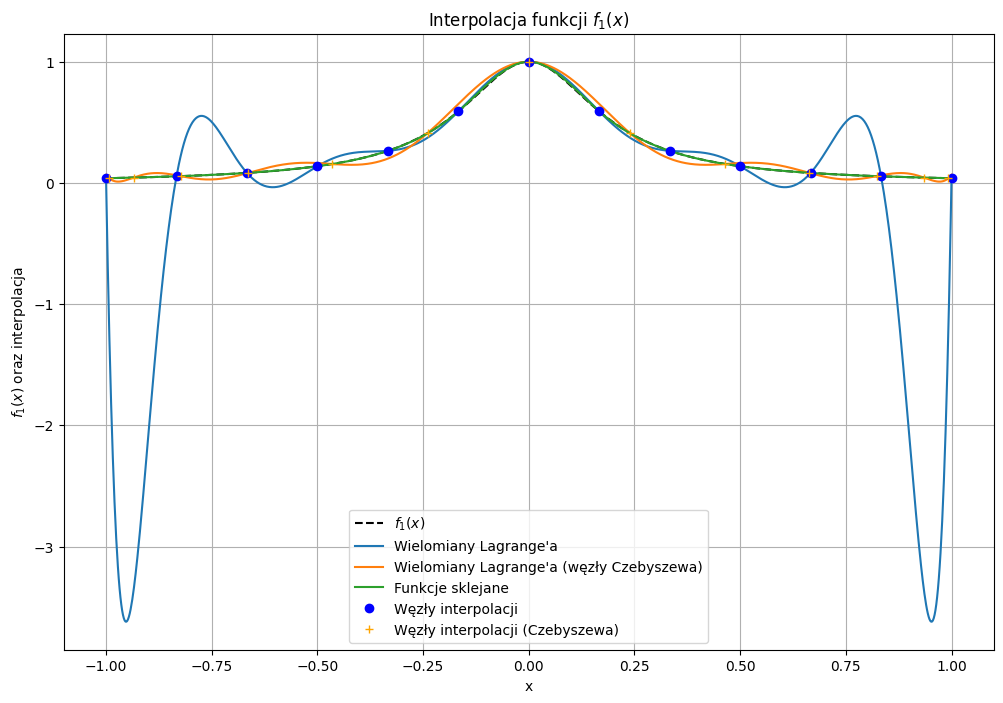

In [7]:
def plot_interpolation(f, interpolation_methods, titles):
    x = np.linspace(-1, 1, 1000)
    f_values = f(x)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, f_values, label='$f_1(x)$', color='black', linestyle='--')
    
    for method, title in zip(interpolation_methods, titles):
        if title == 'Wielomiany Lagrange\'a (węzły Czebyszewa)':
            nodes=chebyshev_nodes(-1, 1, 13)
            interpol_values = method(x, nodes, f(nodes))
        else:
            nodes = np.linspace(-1, 1, 13)
            interpol_values = method(x, nodes, f(nodes))
        plt.plot(x, interpol_values,label=title)
    plt.plot(nodes, f(nodes), 'ro',label='Węzły interpolacji',markerfacecolor='blue', markeredgecolor='blue')
    plt.plot(chebyshev_nodes(-1, 1, 13), f(chebyshev_nodes(-1, 1, 13)), '+',label='Węzły interpolacji (Czebyszewa)',markerfacecolor='orange', markeredgecolor='orange')
    plt.xlabel('x')
    plt.ylabel('$f_1(x)$ oraz interpolacja')
    plt.title('Interpolacja funkcji $f_1(x)$')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_interpolation(f1, interpolation_methods, titles)

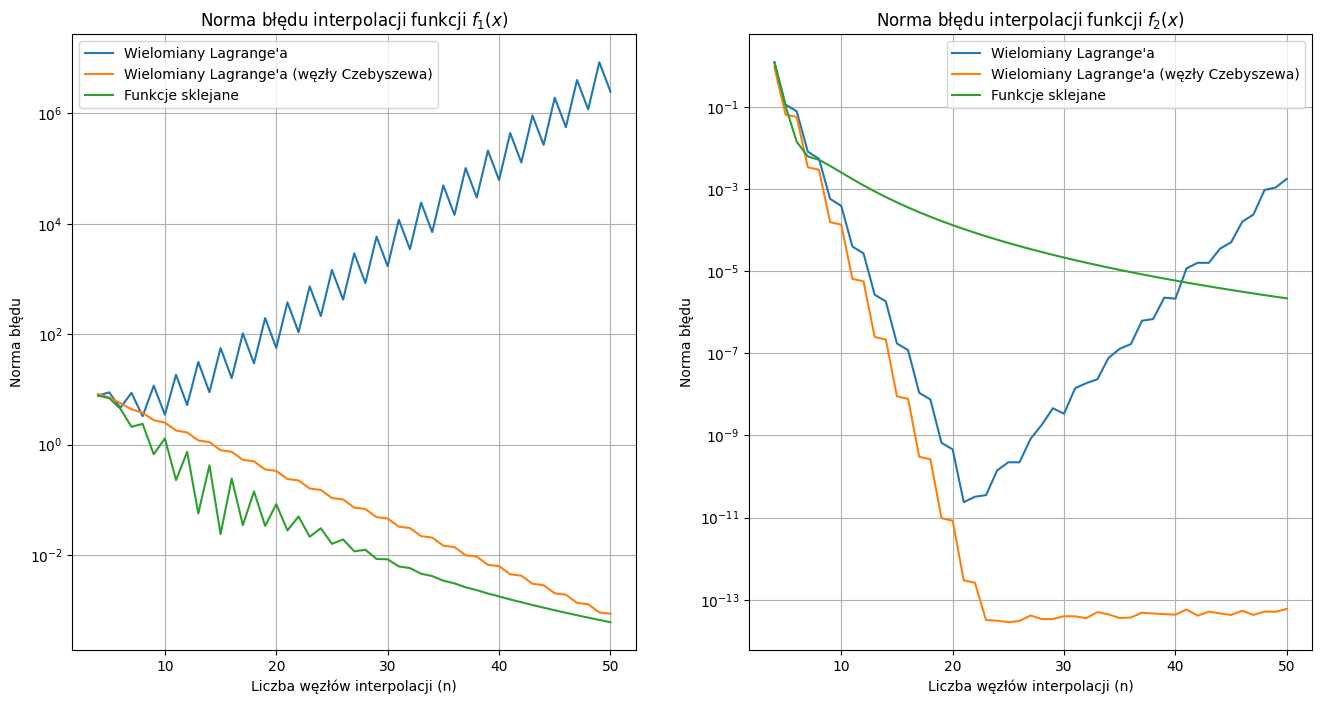

In [8]:
def plot_interpolation_errors(f1,f2, interpolation_methods, titles):
    x = np.linspace(-1, 1, 1000)
    f1_values = f1(x)
    f2_values = f2(x)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    for method, title in zip(interpolation_methods, titles):
        method_errors = []
        for n in range(4, 51):
            if title == 'Wielomiany Lagrange\'a (węzły Czebyszewa)':
                nodes=chebyshev_nodes(-1, 1, n)
                interpol_values = method(x, nodes, f1(nodes))
            else:
                nodes = np.linspace(-1, 1, n)
                interpol_values = method(x, nodes, f1(nodes))
            error = np.linalg.norm(interpol_values - f1_values)
            method_errors.append(error)
        plt.plot(range(4, 51), method_errors, label=title)
    plt.xlabel('Liczba węzłów interpolacji (n)')
    plt.ylabel('Norma błędu')
    plt.yscale("log")
    plt.title('Norma błędu interpolacji funkcji $f_1(x)$')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    for method, title in zip(interpolation_methods, titles):
        method_errors = []
        for n in range(4, 51):
            if title == 'Wielomiany Lagrange\'a (węzły Czebyszewa)':
                nodes=chebyshev_nodes(-1, 1, n)
                interpol_values = method(x, nodes, f2(nodes))
            else:
                nodes = np.linspace(-1, 1, n)
                interpol_values = method(x, nodes, f2(nodes))
            error = np.linalg.norm(interpol_values - f2_values)
            method_errors.append(error)
        plt.plot(range(4, 51), method_errors, label=title)

    plt.xlabel('Liczba węzłów interpolacji (n)')
    plt.ylabel('Norma błędu')
    plt.yscale("log")
    plt.title('Norma błędu interpolacji funkcji $f_2(x)$')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_interpolation_errors(f1,f2, interpolation_methods, titles)
